# Projections onto Subspaces

<https://www.youtube.com/watch?v=Y_Ac6KiQ1t0&t=2s>



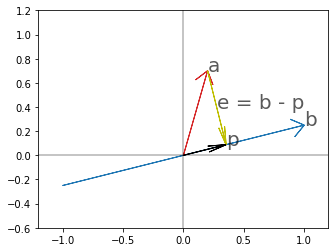

In [8]:
import pylinearalgebra.vistools as vist
xy = vist.XY(x_lim=(-1.2, 1.2), y_lim=(-0.6, 1.2))
xy.vector(
    (-1, -0.25), (1, 0.25), to_text='b', head_length=0.1)
xy.vector((0, 0), (0.2, 0.7), to_text='a', head_length=0.1)
xy.vector(
    (0.2, 0.7), 
    (0.35294, 0.08823520), 
    shaft_text='e = b - p', 
    head_width=0.05,
    head_length=0.15
)
xy.vector(
    (0, 0),
    (0.35294, 0.08823520),
    to_text='p',
    head_width=0.05,
    head_length=0.15
)

## motivation in $R^2$

find the projection of $a$ on $b$, i.e. find the point on line $b$
that is the closest to $a$

$p = x a$, to find $x$, a scalar, I must use the key fact: the orthogonality

$a^{T} p = 0\\
a^{T} (b - xa) = 0\\
x \ a^{T} a = a^{T} b\\
x = \frac{a^{T}b}{a^{T}a}$

### the projection matrix

$proj_{p} = P b$

format the above formula on $x$ to the matrix form I get:

$P = \frac{a a^{T}}{a^{T}a}$

note, the terms DO NOT cancel!!

recall that $a^{T}a$ is a number (the length of $a$ sqrt)

whereas $a a^{T}$ is a column times a row, which is a N x N matrix!!

### the properties of the projection matrix

rank of $P$, $C(P)$ ? (recall what is a colspace: mult this matrix
by a vector, result in a vector still in the colspace)

colspace is the line of $a$

and its rank is 1 (recall $P$ is formed by col x row, which is
a lin-comb of the column, hence col is the basis of $C(P)$ and
its rank is 1)

is $P$ symmetric? yes $P^{T} = P$, **property no. 1**

projecting b twice results in the same p

$P^{2} = P$, **property no.2**

# Recitation and Exercises

<https://www.youtube.com/watch?v=t-n4a18AW08>